# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None
pd.options.display.max_rows = 200

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
!ls
!head -n 5 craftcans.csv

#This is the old import
df=pd.read_csv("craftcans.csv")
df.head()

#Now do it again fixing the missing stuff
df=pd.read_csv("craftcans.csv", na_values="Does not apply")
df.head()


Dataset ONE - Beer cans.ipynb craftcans.csv
Dale's Pale Ale,Oskar Blues Brewery,"Longmont, CO",American Pale Ale (APA),12 oz.,6.50%,65,8.70%,8500.,4.90%,17applyt applylyly not apply,51

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [3]:
df.shape

(2416, 7)

In [4]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [5]:
df.Brewery.value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [6]:
df.ABV.value_counts().head(10)

5.00%    215
5.50%    158
6.00%    125
6.50%    123
5.20%    107
7.00%     92
4.50%     89
4.80%     72
5.80%     66
5.60%     66
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [7]:
df.ABV.head()

0    4.50%
1    4.90%
2    4.80%
3    6.00%
4    6.00%
Name: ABV, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is usually used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells*

In [8]:
#Check
df.ABV.str.replace("%","")

#ok replace
df.ABV=df.ABV.str.replace("%","")


### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [9]:
df.ABV=df.ABV.astype(float)
df.dtypes
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25.0


## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [10]:
df.ABV.mean()

5.977342419080068

<AxesSubplot:>

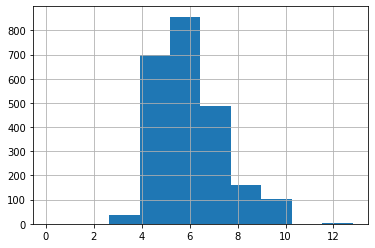

In [11]:
df.ABV.hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isna()` or `notna()` to see where a column is missing/not missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [12]:
#This just lists it out
df.ABV.value_counts(dropna=False)


5.0     215
5.5     158
6.0     125
6.5     123
5.2     107
7.0      92
4.5      89
4.8      72
NaN      68
5.8      66
5.6      66
5.1      62
5.3      60
4.9      59
6.2      59
8.0      57
4.7      57
6.8      52
5.7      52
5.4      50
7.5      43
6.3      38
4.0      38
4.2      38
7.2      37
9.9      35
5.9      34
6.9      32
4.6      32
8.5      26
6.7      25
9.0      24
8.2      22
6.4      21
6.1      21
6.6      20
7.3      18
7.1      18
4.4      16
3.9      15
9.2      13
7.7      13
4.3      12
7.8      10
8.7      10
9.5       9
4.1       9
7.4       8
8.3       8
7.9       7
8.8       6
3.5       6
3.8       6
9.6       5
7.6       5
9.3       5
9.7       5
8.1       4
3.7       4
8.6       4
9.8       3
3.2       3
8.4       3
9.1       3
8.9       2
2.7       2
9.4       1
3.4       1
10.0      1
2.8       1
12.5      1
10.4      1
12.8      1
12.0      1
0.1       1
Name: ABV, dtype: int64

In [13]:
#This filters and then tells me how many rows. 
df.query("ABV.isna()")
df.query("ABV.isna()").shape

(68, 7)

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [14]:
#Data is all cans, so just value counts by city (value_counts operates on the series city.
#So that is like having the bys)
df.Location.value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [15]:
#filter
df.query("Location=='Brooklyn, NY'")

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most types of canned beer?

In [16]:
bk = df.query("Location=='Brooklyn, NY'")

#The easiest way is to assume that "types of beer" means the Beer variable (e.g. BK lager 120z)
#In this case, it's just the value_counts by brewery
bk.Brewery.value_counts()


Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

In [17]:
#But if we assume that types = styles, then we need to do Stata equiv of 
#bys brewery: egen unique_styles=nvals(Style)

#This is the number of unique instances overall.  Now need to combine this with a groupby somehow.
bk.agg({"Style": "nunique"})

#Now try to do it by groupby -- first group, then use the agg function.
bk.groupby("Brewery").agg({"Style": "nunique"})

#Note: agg seems to work like stata collapse.
#This doc seems useful
#https://pbpython.com/groupby-agg.html


,Style
Brewery,
Brooklyn Brewery,3
Evil Twin Brewing,4
KelSo Beer Company,3
Sixpoint Craft Ales,16


## What are the five styles of beer that Sixpoint produces the most cans of?

In [18]:

bk.query("Brewery=='Sixpoint Craft Ales'").Style.value_counts().head(5)

American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match **part** of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [19]:

#df[df.Location.str.contains("NY", na=False)]
# df[df.Narrative_1.str.contains("PUNCH.*WALL", na=False)]

df.query("Location.str.contains('NY', na=False)")



,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
598,8 Barrel,Chatham Brewing,"Chatham, NY",American Strong Ale,16 oz.,8.0,69.0
599,Oktoberfest,Chatham Brewing,"Chatham, NY",Märzen / Oktoberfest,16 oz.,5.5,40.0
628,Cream Ale,Newburgh Brewing Company,"Newburgh, NY",Cream Ale,12 oz.,4.2,35.0


### Now *count* all of the breweries in New York state

In [20]:
ny=df.query("Location.str.contains('NY', na=False)")
ny.shape


(74, 7)

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [21]:
df.query("Style.str.contains('IPA', na=False)")

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120.0
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99.0
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0


IPAs are usually pretty hoppy and bitter (although I guess hazy IPAs and session IPAs are changing that since I first made this homework!). IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [24]:
#Works now that we called Does not apply NaN
df.IBUs.mean()


42.71316725978647

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*

<AxesSubplot:>

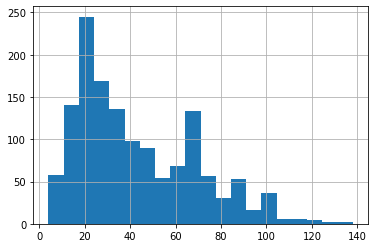

In [25]:
df.IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [29]:
df.IBUs.quantile([.25, .5, .75])


0.25    21.0
0.50    35.0
0.75    64.0
Name: IBUs, dtype: float64

In [30]:
df.query("IBUs>64")

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0


## List all of the beers with IBUs below the 25th percentile

In [31]:
df.query("IBUs<21")

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0
...,...,...,...,...,...,...,...
2372,Bombshell Blonde,Southern Star Brewing Company,"Conroe, TX",American Blonde Ale,12 oz.,5.0,20.0
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.5,18.0
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.6,11.0
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.1,20.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [32]:
df.groupby(by="Style").IBUs.median()

Style
Abbey Single Ale                       22.0
Altbier                                36.5
American Adjunct Lager                  9.0
American Amber / Red Ale               31.0
American Amber / Red Lager             23.0
American Barleywine                    96.0
American Black Ale                     73.0
American Blonde Ale                    20.0
American Brown Ale                     26.0
American Dark Wheat Ale                25.0
American Double / Imperial IPA         91.0
American Double / Imperial Pilsner     85.0
American Double / Imperial Stout       51.0
American IPA                           69.0
American India Pale Lager              65.0
American Malt Liquor                    NaN
American Pale Ale (APA)                44.0
American Pale Lager                    18.5
American Pale Wheat Ale                20.0
American Pilsner                       21.5
American Porter                        31.0
American Stout                         40.0
American Strong Ale       

Style    99
dtype: int64


<AxesSubplot:ylabel='Style'>

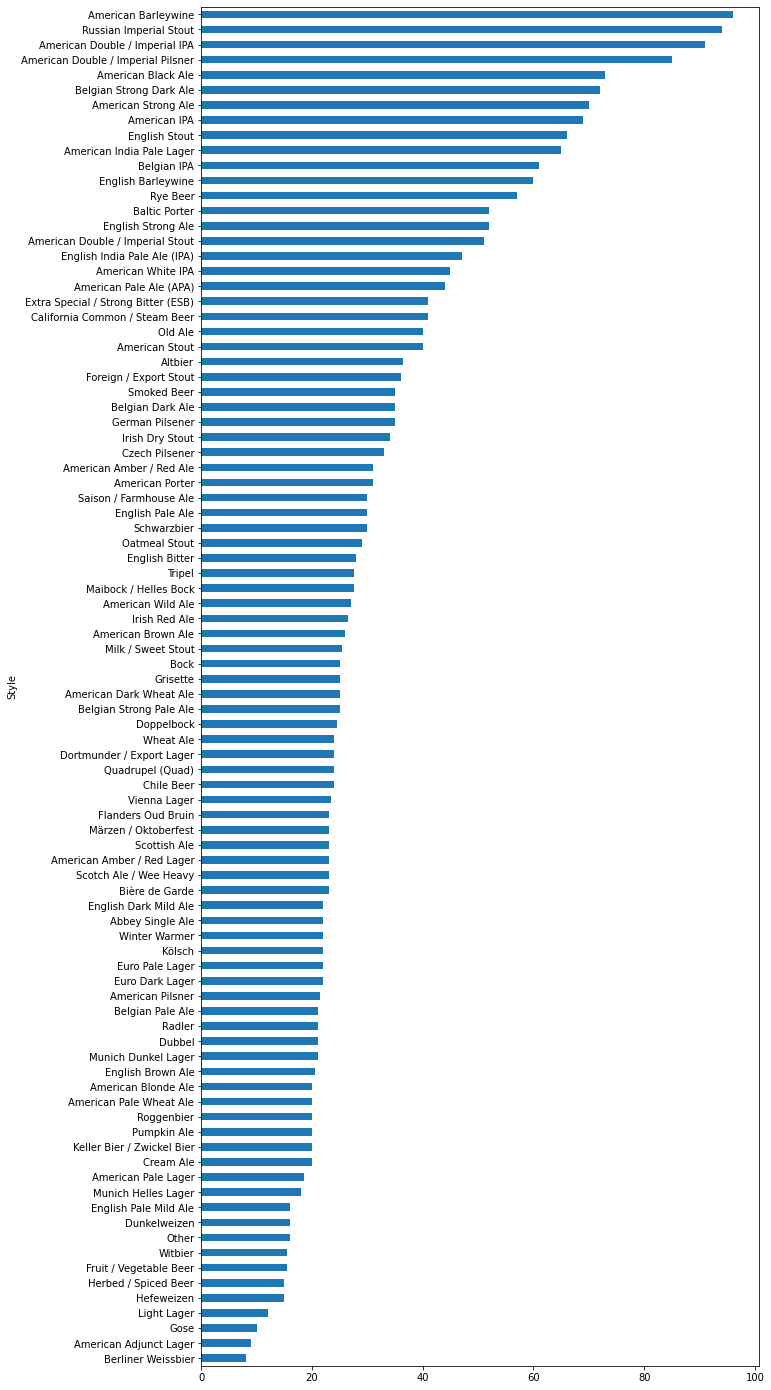

In [48]:
#Now graph that
print(df.agg({"Style": "nunique"}))

#omg so ugly
df.groupby(by="Style").IBUs.median().sort_values().plot(kind="barh")

#Try making the y figure size way bigger?
df.groupby(by="Style").IBUs.median().sort_values().plot(kind="barh", figsize=(10, 25))

#Oh, now there are those missings -- drop these from the plot
dftemp=df.dropna(subset=["IBUs"])
dftemp.groupby(by="Style").IBUs.median().sort_values().plot(kind="barh", figsize=(10, 25))



## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [50]:
#High
dftemp.groupby(by="Style").IBUs.median().sort_values(ascending=False).head()

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
Name: IBUs, dtype: float64

In [51]:
#Low
dftemp.groupby(by="Style").IBUs.median().sort_values(ascending=True).head()

Style
Berliner Weissbier         8.0
American Adjunct Lager     9.0
Gose                      10.0
Light Lager               12.0
Hefeweizen                15.0
Name: IBUs, dtype: float64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [63]:
#Start by getting the mean IBU by style for all of them
dfagg=df.groupby("Style").agg({"IBUs": "mean"})
dfagg.head()

dfagg.query("Style=='Witbier' or Style=='Hefeweizen' or Style=='American Pale Wheat Ale'")


,IBUs
Style,
American Pale Wheat Ale,20.688525
Hefeweizen,17.592593
Witbier,16.208333


## Draw a histogram of the IBUs of those beers

<AxesSubplot:>

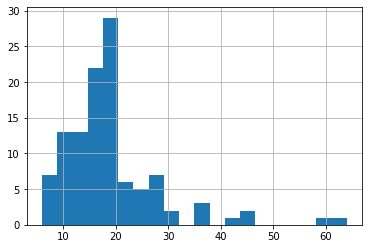

In [64]:

#plot the histogram of all beers that fall into this category (no longer aggregated)
df.query("Style=='Witbier' or Style=='Hefeweizen' or Style=='American Pale Wheat Ale'").IBUs.hist(bins=20)


## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [65]:
df.query("Style.str.contains('IPA', na=False)").IBUs.mean()


71.94897959183673

<AxesSubplot:>

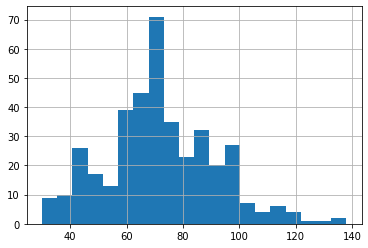

In [67]:
df.query("Style.str.contains('IPA', na=False)").IBUs.hist(bins=20)


## Plot those two histograms on top of one another

To plot two plots on top of one another, you *might* just be able to plot twice in the same cell. It depends on your version of pandas/matplotlib! If it doesn't work, you'll need do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

And then youull get two plots on top of each other. They won't be perfect because the bins won't line up without extra work, but it's fine!

<AxesSubplot:>

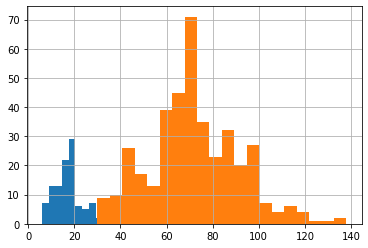

In [70]:
wheat=df.query("Style=='Witbier' or Style=='Hefeweizen' or Style=='American Pale Wheat Ale'").IBUs.hist(bins=20)

df.query("Style.str.contains('IPA', na=False)").IBUs.hist(ax=wheat, bins=20)



## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

<AxesSubplot:>

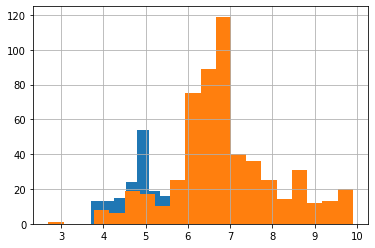

In [71]:
wheat=df.query("Style=='Witbier' or Style=='Hefeweizen' or Style=='American Pale Wheat Ale'").ABV.hist(bins=20)
df.query("Style.str.contains('IPA', na=False)").ABV.hist(ax=wheat,bins=20)


## Good work!

For making it this far, your reward is my recommendation for Athletic Brewing Co.'s products as the best non-alcoholic beer on the market. Their Run Wild IPA and Upside Dawn are both very solid.